### Importing Libraries

In [47]:
import pandas as pd
import numpy as np
import sys, os
from haversine import haversine
import seaborn as sns

import matplotlib.pyplot as plt

from datetime import datetime, timedelta

### Importing data - 4GB Coordinates Dataset

In [48]:
raw = pd.read_csv("D:\\ConcordAI\\coordinates.csv",nrows=1000000) #Load the first million lines - law of large numbers good enough approximation of the dataset. 

### Data exploration

In [49]:
raw.head()

,id,uuid,latitude,longitude,speed,h_accuracy,v_accuracy,point_type,code_rejet,end_of_trip,trip_id,trip_id_origine,timestamp,timestamp_txt
0,72368,C9BC370F-3F1C-42CB-8626-10ED103A5A91,45.528405,-73.640266,9.9,10.0,6.0,0,NaN,NaN,3444630,NaN,2016-10-15,2016-10-15T16:06:23-04
1,188446,EAE51B72-F5A1-4E30-BF4D-D8E30569B3C1,45.538669,-73.559904,14.6,10.0,3.0,0,NaN,NaN,3384546,NaN,2016-10-17,2016-10-17T12:51:50-04
2,685872,CD41DC01-1D7A-4054-B997-00EE4087353D,45.534879,-73.569446,4.0,5.0,8.0,0,NaN,NaN,3151626,NaN,2016-10-18,2016-10-18T08:59:06-04
3,1429402,18E3EA1F-E14A-4D23-951B-6FC66B52B702,45.574006,-73.535274,9.9,10.0,12.0,0,NaN,NaN,1618615,NaN,2016-10-18,2016-10-18T18:07:04-04
4,1611278,859D1266-A5FF-4BCF-9CE0-1613B9CDC4C6,45.536900,-73.612161,11.1,10.0,3.0,0,NaN,NaN,2462656,NaN,2016-10-19,2016-10-19T08:38:33-04


### Column types

In [50]:
raw.dtypes

id                   int64
uuid                object
latitude           float64
longitude          float64
speed              float64
h_accuracy         float64
v_accuracy         float64
point_type           int64
code_rejet         float64
end_of_trip        float64
trip_id              int64
trip_id_origine    float64
timestamp           object
timestamp_txt       object
dtype: object

### Date Time Manipulation

In [51]:
list_ =[]
for val in raw.timestamp_txt:
    val1 = val.split("T")
    list_.append(val1)

time_ = []
for i in range(len(list_)):
    time = list_[i][1]
    time_.append(time)

clock_ = []
for time in time_:
    time = time.split("-")
    clock_.append(time)

clock1_ = []
for i in range(len(clock_)):
    clock = clock_[i][0]
    clock1_.append(clock)

clock = []
for i in clock1_:
    val = i[0:8]
    clock.append(val)


In [52]:
raw['clock_time'] = pd.to_datetime(clock)

In [53]:
raw['clock'] = raw.clock_time.dt.time

id                          int64
uuid                       object
latitude                  float64
longitude                 float64
speed                     float64
h_accuracy                float64
v_accuracy                float64
point_type                  int64
code_rejet                float64
end_of_trip               float64
trip_id                     int64
trip_id_origine           float64
timestamp                  object
timestamp_txt              object
clock_time         datetime64[ns]
clock                      object
dtype: object

In [54]:
raw['clock_date'] = pd.to_datetime(raw.timestamp)

In [55]:
raw['dates'] = raw.timestamp + " " + clock
# Sanity Check 1
raw.head()

,id,uuid,latitude,longitude,speed,h_accuracy,v_accuracy,point_type,code_rejet,end_of_trip,trip_id,trip_id_origine,timestamp,timestamp_txt,clock_time,clock,clock_date,dates
0,72368,C9BC370F-3F1C-42CB-8626-10ED103A5A91,45.528405,-73.640266,9.9,10.0,6.0,0,NaN,NaN,3444630,NaN,2016-10-15,2016-10-15T16:06:23-04,2019-07-15 16:06:23,16:06:23,2016-10-15,2016-10-15 16:06:23
1,188446,EAE51B72-F5A1-4E30-BF4D-D8E30569B3C1,45.538669,-73.559904,14.6,10.0,3.0,0,NaN,NaN,3384546,NaN,2016-10-17,2016-10-17T12:51:50-04,2019-07-15 12:51:50,12:51:50,2016-10-17,2016-10-17 12:51:50
2,685872,CD41DC01-1D7A-4054-B997-00EE4087353D,45.534879,-73.569446,4.0,5.0,8.0,0,NaN,NaN,3151626,NaN,2016-10-18,2016-10-18T08:59:06-04,2019-07-15 08:59:06,08:59:06,2016-10-18,2016-10-18 08:59:06
3,1429402,18E3EA1F-E14A-4D23-951B-6FC66B52B702,45.574006,-73.535274,9.9,10.0,12.0,0,NaN,NaN,1618615,NaN,2016-10-18,2016-10-18T18:07:04-04,2019-07-15 18:07:04,18:07:04,2016-10-18,2016-10-18 18:07:04
4,1611278,859D1266-A5FF-4BCF-9CE0-1613B9CDC4C6,45.536900,-73.612161,11.1,10.0,3.0,0,NaN,NaN,2462656,NaN,2016-10-19,2016-10-19T08:38:33-04,2019-07-15 08:38:33,08:38:33,2016-10-19,2016-10-19 08:38:33


In [56]:
raw['Date_Time1'] = raw.dates.apply(pd.to_datetime) # Converting date time column to a datetime object. 

### Montreal Weather Data 

In [57]:
weather_df = pd.read_csv("C:\\Itinerum GIS DATA\\Data\\Weather_mtl.csv",skiprows=24,encoding="latin_1") # Skip the first 24 lines in order to get rid of legend

In [68]:
weather_df.timestamp.apply(pd.to_datetime) # convert timestamp to datetime object

0     2016-01-01
1     2016-01-02
2     2016-01-03
3     2016-01-04
4     2016-01-05
5     2016-01-06
6     2016-01-07
7     2016-01-08
8     2016-01-09
9     2016-01-10
10    2016-01-11
11    2016-01-12
12    2016-01-13
13    2016-01-14
14    2016-01-15
15    2016-01-16
16    2016-01-17
17    2016-01-18
18    2016-01-19
19    2016-01-20
20    2016-01-21
21    2016-01-22
22    2016-01-23
23    2016-01-24
24    2016-01-25
25    2016-01-26
26    2016-01-27
27    2016-01-28
28    2016-01-29
29    2016-01-30
         ...    
336   2016-12-02
337   2016-12-03
338   2016-12-04
339   2016-12-05
340   2016-12-06
341   2016-12-07
342   2016-12-08
343   2016-12-09
344   2016-12-10
345   2016-12-11
346   2016-12-12
347   2016-12-13
348   2016-12-14
349   2016-12-15
350   2016-12-16
351   2016-12-17
352   2016-12-18
353   2016-12-19
354   2016-12-20
355   2016-12-21
356   2016-12-22
357   2016-12-23
358   2016-12-24
359   2016-12-25
360   2016-12-26
361   2016-12-27
362   2016-12-28
363   2016-12-

In [70]:
weather_df.head() # Data Exploration Sanity Check

,timestamp,Year,Month,Day,Data Quality,Max Temp (°C),Max Temp Flag,Min Temp (°C),Min Temp Flag,Mean Temp (°C),...,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
0,1/1/2016,2016,1,1,NaN,0.4,NaN,-4.0,NaN,-1.8,...,NaN,M,0.2,NaN,14.0,NaN,27.0,NaN,50,NaN
1,1/2/2016,2016,1,2,NaN,1.2,NaN,-4.3,NaN,-1.6,...,NaN,M,0.7,NaN,14.0,NaN,25.0,NaN,41,NaN
2,1/3/2016,2016,1,3,NaN,0.8,NaN,-14.3,NaN,-6.8,...,NaN,M,4.1,NaN,14.0,NaN,33.0,NaN,41,NaN
3,1/4/2016,2016,1,4,NaN,-13.4,NaN,-22.1,NaN,-17.8,...,NaN,M,0.2,NaN,17.0,NaN,35.0,NaN,39,NaN
4,1/5/2016,2016,1,5,NaN,-6.0,NaN,-22.1,NaN,-14.1,...,NaN,M,0.0,NaN,18.0,NaN,23.0,NaN,37,NaN


In [71]:
# Dropping useless columns in weather DataFrame
filter_weatherdf = weather_df.drop(['Year', 'Month', 'Day', 'Data Quality','Max Temp Flag','Min Temp Flag','Mean Temp Flag', 'Heat Deg Days (°C)','Heat Deg Days Flag','Cool Deg Days (°C)', 'Cool Deg Days Flag','Total Rain Flag', 'Total Snow (cm)', 'Total Snow Flag', 'Total Precip Flag', 'Snow on Grnd (cm)','Snow on Grnd Flag', 'Dir of Max Gust (10s deg)','Dir of Max Gust Flag', 'Spd of Max Gust (km/h)','Spd of Max Gust Flag'],axis=1)

In [74]:
weather_df.rename(columns={'Date/Time':'timestamp'},inplace=True) # renaming date/time column name in order to prepare for the merge of two dataframes. 

In [77]:
weather_df['timestamp'] = weather_df.timestamp.apply(pd.to_datetime) # Converting the timestamp column to type datetime object. 

In [81]:
raw.columns # Column check to see useless columns not can be dropped to increase computation speed. 

Index(['id', 'uuid', 'latitude', 'longitude', 'speed', 'h_accuracy',
       'v_accuracy', 'point_type', 'code_rejet', 'end_of_trip', 'trip_id',
       'trip_id_origine', 'timestamp', 'timestamp_txt', 'clock_time', 'clock',
       'clock_date', 'dates', 'Date_Time1', 'Year', 'Month', 'Day',
       'Data Quality', 'Max Temp (°C)', 'Max Temp Flag', 'Min Temp (°C)',
       'Min Temp Flag', 'Mean Temp (°C)', 'Mean Temp Flag',
       'Heat Deg Days (°C)', 'Heat Deg Days Flag', 'Cool Deg Days (°C)',
       'Cool Deg Days Flag', 'Total Rain (mm)', 'Total Rain Flag',
       'Total Snow (cm)', 'Total Snow Flag', 'Total Precip (mm)',
       'Total Precip Flag', 'Snow on Grnd (cm)', 'Snow on Grnd Flag',
       'Dir of Max Gust (10s deg)', 'Dir of Max Gust Flag',
       'Spd of Max Gust (km/h)', 'Spd of Max Gust Flag'],
      dtype='object')

In [82]:
raw.drop(['h_accuracy',
       'v_accuracy', 'point_type', 'code_rejet', 'end_of_trip','trip_id_origine', 'Data Quality', 'Max Temp (°C)', 'Max Temp Flag', 'Min Temp (°C)',
       'Min Temp Flag', 'Mean Temp (°C)', 'Mean Temp Flag',
       'Heat Deg Days (°C)', 'Heat Deg Days Flag', 'Cool Deg Days (°C)',
       'Cool Deg Days Flag', 'Total Rain (mm)', 'Total Rain Flag',
       'Total Snow (cm)', 'Total Snow Flag', 'Total Precip (mm)',
       'Total Precip Flag', 'Snow on Grnd (cm)', 'Snow on Grnd Flag',
       'Dir of Max Gust (10s deg)', 'Dir of Max Gust Flag',
       'Spd of Max Gust (km/h)', 'Spd of Max Gust Flag'],axis=1,inplace=True)

In [85]:
raw.timestamp = raw.timestamp.apply(pd.to_datetime)

In [86]:
raw_weather = raw.merge(weather_df, on='timestamp', how='outer') #Outer merge of original dataframe and the weather data from the Canadian Gov. Website. 

In [89]:
raw_weather.drop(['Max Temp Flag', 
       'Min Temp Flag', 'Mean Temp Flag',
       'Heat Deg Days (°C)', 'Heat Deg Days Flag', 'Cool Deg Days (°C)',
       'Cool Deg Days Flag', 'Total Rain Flag',
        'Total Snow Flag', 
       'Total Precip Flag', 'Snow on Grnd (cm)', 'Snow on Grnd Flag',
       'Dir of Max Gust (10s deg)', 'Dir of Max Gust Flag',
       'Spd of Max Gust (km/h)', 'Spd of Max Gust Flag'],axis=1,inplace=True)

In [90]:
raw = raw_weather

In [92]:
raw.drop(['Data Quality'],axis=1,inplace=True)

In [93]:
raw.columns

Index(['id', 'uuid', 'latitude', 'longitude', 'speed', 'trip_id', 'timestamp',
       'timestamp_txt', 'clock_time', 'clock', 'clock_date', 'dates',
       'Date_Time1', 'Year_x', 'Month_x', 'Day_x', 'Year_y', 'Month_y',
       'Day_y', 'Max Temp (°C)', 'Min Temp (°C)', 'Mean Temp (°C)',
       'Total Rain (mm)', 'Total Snow (cm)', 'Total Precip (mm)'],
      dtype='object')

### Sort values based on the trip_id and the timestamp 

In [94]:
raw = raw.sort_values(['trip_id','Date_Time1']) 

### Convert to datetime - Generate Acceleration and Jerk Features 

In [96]:
raw['timediff'] = raw.Date_Time1.diff().dt.seconds + 1   #Time difference is in seconds

In [97]:
raw['speeddiff'] = raw.speed.diff()                     # This will subtract the speed in postiion 2 - position 1

In [98]:
raw['acceleration'] = raw.speeddiff / raw.timediff     # divide the speed difference with the time difference to get the acceleration 

In [99]:
raw['accelerationdiff'] = raw.acceleration.diff()     # This will subtract the acceleration in position 2 - position 1 

In [100]:
raw['jerk'] = raw.accelerationdiff / raw.timediff    # Jerk (4th derivative of Transportation)  

### Filtering the trip_id columns for values greater than 3

In [101]:
raw = raw.groupby("trip_id").filter(lambda x: len(x) >= 3)

### Hour Column Manipulation after the filtering of trip_ids less than 3

In [103]:
raw['Hour'] = (raw.clock_time.dt.hour)

In [104]:
sample = raw.groupby('trip_id').size()
unique_id = sample.to_dict()             # type(sample) # turn this into a dictionary 

### Converting the coordinate list into a float numpy array 

In [106]:
coordinates =  list(zip(raw.latitude, raw.longitude))
raw['LL'] = coordinates 

### Function to estimate the time of the day

In [107]:
def hours(x):
    if x>=6 and x<=9:
        return 'MR'             # Morning Rush
    elif x>=15 and x<=18:
        return 'NR'             #Night rush
    else:
        return 'S' #Stationary
    
        

In [108]:
raw['RushhourType'] = raw['Hour'].apply(hours)

### PublicTransportation closing hours

In [109]:
def closed_transit(x):
    if x >=1 and x<=5:
        return 1
    else:
        return 0

In [110]:
raw['ClosedTransit'] = raw['Hour'].apply(closed_transit)

### Distance Calculations

In [113]:
vals = [np.nan]
LL_col = pd.DataFrame()
LL_col['LL'] = raw.LL.as_matrix()

for i in range(1, raw.shape[0]):
    
    pair1 = LL_col['LL'][i-1]
    pair2 = LL_col['LL'][i]
    val = (haversine(pair1,pair2,unit='km'))
    vals.append(val)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


### Total Distance Feature

In [114]:
raw['Distance'] = vals

### Weekday and Weekends 

In [115]:
raw['Weekends'] = raw.Date_Time1.dt.day_name()
raw.Weekends = raw.Weekends.replace(to_replace=['Saturday','Sunday'], value=1)
raw.Weekends = raw.Weekends.replace(to_replace=['Monday','Tuesday','Wednesday','Thursday','Friday'], value=0)
raw.Weekends.value_counts()

0    949807
1     20351
Name: Weekends, dtype: int64

### Time of Day

In [116]:
def time_of_day(x):
    if x>= 5 and x<10:
        return 'morning'
    elif x>=10 and x<12:
        return 'lunch'
    elif x>=12 and x<16:
        return 'afternoon'
    elif x>=16 and x<18:
        return 'evening'
    elif ((x>=18 and x<=24) or (x>24 and x<5)):
        return 'night'
    else:
        return np.nan

raw['TimeOfDay'] = raw.Hour.apply(time_of_day)

In [117]:
raw.columns

Index(['id', 'uuid', 'latitude', 'longitude', 'speed', 'trip_id', 'timestamp',
       'timestamp_txt', 'clock_time', 'clock', 'clock_date', 'dates',
       'Date_Time1', 'Year_x', 'Month_x', 'Day_x', 'Year_y', 'Month_y',
       'Day_y', 'Max Temp (°C)', 'Min Temp (°C)', 'Mean Temp (°C)',
       'Total Rain (mm)', 'Total Snow (cm)', 'Total Precip (mm)', 'timediff',
       'speeddiff', 'acceleration', 'accelerationdiff', 'jerk', 'Hour', 'LL',
       'RushhourType', 'ClosedTransit', 'Distance', 'Weekends', 'TimeOfDay'],
      dtype='object')

### Rough Features 

In [118]:
# Percentile function for the aggregation

def pct(x):
    return np.quantile(x,0.85)

In [120]:
raw.speed = raw.speed.astype(float)
groupby_list = ['trip_id']
temp = raw.groupby(groupby_list).agg({
    'speed' : [
        ('SpeedPct', pct),
        ('MaxSpeed', 'max'),
        ('STDSpeed', 'std'),
        ('MeanSpeed', 'mean')],
         'Weekends' : ['first'],
         'RushhourType': ['first'],
         'ClosedTransit' : ['first'],
         'TimeOfDay' : ['first'],
         'Date_Time1' : ['first'],
         'Max Temp (°C)' : ['first'],
         'Mean Temp (°C)' : ['first'],
         'Total Rain (mm)' : ['first'],
         'Total Snow (cm)' : ['first'],
         'Total Precip (mm)' : ['first']
})



In [123]:
temp.drop([ 'Total Rain (mm)', 'Total Snow (cm)'],axis=1,inplace=True)

In [124]:
temp.head()

speed                                Weekends RushhourType  \
            SpeedPct  MaxSpeed  STDSpeed  MeanSpeed    first        first   
trip_id                                                                     
1435119.0   6.558000   6.82000  1.811063   5.182500        0           NR   
1435259.0  11.261100  13.50930  3.294527   8.326376        0            S   
1435307.0  12.170000  14.80000  3.801662   8.620635        0           NR   
1435318.0  14.810000  17.10000  3.764780  10.323404        0           NR   
1435322.0   3.687064   4.52607  1.409964   1.947943        0           NR   

          ClosedTransit  TimeOfDay          Date_Time1 Max Temp (°C)  \
                  first      first               first         first   
trip_id                                                                
1435119.0             0    evening 2016-10-18 17:35:56          24.8   
1435259.0             1    morning 2016-10-18 05:26:43          24.8   
1435307.0             0  afternoon 2016-10-17 15:45:39          15.5   
1435318.0             0    evening 2016-10-17 16:24:58          15.5   
1435322.0             0    evening 2016-10-18 17:22:06          24.8   

          Mean Temp (°C) Total Precip (mm)  
                   first             first  
trip_id                                     
1435119.0           16.8               5.0  
1435259.0           16.8               5.0  
1435307.0           12.3               0.0  
1435318.0           12.3               0.0  
1435322.0           16.8               5.0

In [125]:
test = raw.groupby(groupby_list).sum()

df_temp = pd.merge(temp,test['Distance'], on="trip_id") # Dataframe of the trades taken by the model 

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:522: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


In [126]:
def distance(x):
    if len(x) <= 1:
        return 0
    else:
        return np.sum(x[1:])

In [127]:
temp['TotalDistance'] = raw.groupby(groupby_list).apply(lambda x: distance(x['Distance'].values))

In [128]:
tester = []

# Accessing the values of the dictionary with a loop 

for value in unique_id.values():
    tester.append(value)

temp['AverageDistanceBetweenPoints']= temp.TotalDistance/tester


In [129]:
def pct(x):
    if len(x) <= 1:
        return 0
    else:
        return np.quantile(x[1:], 0.85)

In [130]:
temp['AccelPct'] = raw.groupby(groupby_list).apply(lambda x: pct(x['acceleration'].values))

In [131]:
def max_(x):
    if len(x) <= 1:
        return 0
    else:
        return max(x[1:])

In [132]:
temp['MaxAccel'] = raw.groupby(groupby_list).apply(lambda x: max_(x['acceleration'].values))

In [133]:
def STD(x):
    if len(x) <= 1:
        return 0
    else:
        return np.std(x[1:])

In [134]:
temp['STDAccel'] = raw.groupby(groupby_list).apply(lambda x: STD(x['acceleration'].values))
temp['test'] = raw.groupby(groupby_list).apply(lambda x: STD(x['speed'].values))

In [135]:
def mean(x):
    if len(x) <= 1:
        return 0
    else:
        return np.mean(x[1:])

In [136]:
temp['MeanAccel'] = raw.groupby(groupby_list).apply(lambda x: mean(x['acceleration'].values))

In [137]:
temp.head()

speed                                Weekends RushhourType  \
            SpeedPct  MaxSpeed  STDSpeed  MeanSpeed    first        first   
trip_id                                                                     
1435119.0   6.558000   6.82000  1.811063   5.182500        0           NR   
1435259.0  11.261100  13.50930  3.294527   8.326376        0            S   
1435307.0  12.170000  14.80000  3.801662   8.620635        0           NR   
1435318.0  14.810000  17.10000  3.764780  10.323404        0           NR   
1435322.0   3.687064   4.52607  1.409964   1.947943        0           NR   

          ClosedTransit  TimeOfDay          Date_Time1 Max Temp (°C)  \
                  first      first               first         first   
trip_id                                                                
1435119.0             0    evening 2016-10-18 17:35:56          24.8   
1435259.0             1    morning 2016-10-18 05:26:43          24.8   
1435307.0             0  afternoon 2016-10-17 15:45:39          15.5   
1435318.0             0    evening 2016-10-17 16:24:58          15.5   
1435322.0             0    evening 2016-10-18 17:22:06          24.8   

          Mean Temp (°C) Total Precip (mm) TotalDistance  \
                   first             first                 
trip_id                                                    
1435119.0           16.8               5.0      0.767047   
1435259.0           16.8               5.0      3.567802   
1435307.0           12.3               0.0      3.752922   
1435318.0           12.3               0.0      2.826822   
1435322.0           16.8               5.0      0.294464   

          AverageDistanceBetweenPoints  AccelPct  MaxAccel  STDAccel  \
                                                                       
trip_id                                                                
1435119.0                     0.063921  0.055341  0.176667  0.110468   
1435259.0                     0.087020  0.405817  0.807573  0.441285   
1435307.0                     0.059570  0.281548  0.580000  0.282717   
1435318.0                     0.060145  0.523810  1.225000  0.484692   
1435322.0                     0.036808  0.035448  0.061202  0.104959   

               test MeanAccel  
                               
trip_id                        
1435119.0  1.810294 -0.012075  
1435259.0  3.188346 -0.007649  
1435307.0  3.796281  0.006981  
1435318.0  3.764779  0.030493  
1435322.0  1.197090 -0.028192

In [138]:
temp['JerkPct'] = raw.groupby(groupby_list).apply(lambda x: pct(x['jerk'].values))

In [139]:
temp['MaxJerk'] = raw.groupby(groupby_list).apply(lambda x: max_(x['jerk'].values))

In [140]:
temp['STDJerk'] = raw.groupby(groupby_list).apply(lambda x: STD(x['jerk'].values))

In [141]:
temp['MeanJerk'] = raw.groupby(groupby_list).apply(lambda x: mean(x['jerk'].values))

In [142]:
temp.columns

MultiIndex(levels=[['speed', 'Weekends', 'RushhourType', 'ClosedTransit', 'TimeOfDay', 'Date_Time1', 'Max Temp (°C)', 'Mean Temp (°C)', 'Total Rain (mm)', 'Total Snow (cm)', 'Total Precip (mm)', 'TotalDistance', 'AverageDistanceBetweenPoints', 'AccelPct', 'MaxAccel', 'STDAccel', 'test', 'MeanAccel', 'JerkPct', 'MaxJerk', 'STDJerk', 'MeanJerk'], ['MaxSpeed', 'MeanSpeed', 'STDSpeed', 'SpeedPct', 'first', '']],
           codes=[[0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21], [3, 0, 2, 1, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]])

In [143]:
temp.columns = ['SpeedPct', 'MaxSpeed', 'STDSpeed', 'MeanSpeed', 'Weekends', 'RushHourType', 'ClosedTransit', 'TimeOfDay','Date_Time1','Max Temp','Mean Temp','Total Precip','TotalDistance','AverageDistanceBetweenPoints','AccelPct', 'MaxAccel', 'STDAccel','test','MeanAccel','JerkPct','MaxJerk','STDJerk','MeanJerk']

In [144]:
temp.head()

,SpeedPct,MaxSpeed,STDSpeed,MeanSpeed,Weekends,RushHourType,ClosedTransit,TimeOfDay,Date_Time1,Max Temp,...,AverageDistanceBetweenPoints,AccelPct,MaxAccel,STDAccel,test,MeanAccel,JerkPct,MaxJerk,STDJerk,MeanJerk
trip_id,,,,,,,,,,,,,,,,,,,,,
1435119.0,6.558000,6.82000,1.811063,5.182500,0,NR,0,evening,2016-10-18 17:35:56,24.8,...,0.063921,0.055341,0.176667,0.110468,1.810294,-0.012075,0.005593,0.016156,0.009088,-0.000830
1435259.0,11.261100,13.50930,3.294527,8.326376,0,S,1,morning,2016-10-18 05:26:43,24.8,...,0.087020,0.405817,0.807573,0.441285,3.188346,-0.007649,0.082384,0.134595,0.065487,0.000837
1435307.0,12.170000,14.80000,3.801662,8.620635,0,NR,0,afternoon,2016-10-17 15:45:39,15.5,...,0.059570,0.281548,0.580000,0.282717,3.796281,0.006981,0.027467,0.081226,0.045742,-0.004737
1435318.0,14.810000,17.10000,3.764780,10.323404,0,NR,0,evening,2016-10-17 16:24:58,15.5,...,0.060145,0.523810,1.225000,0.484692,3.764779,0.030493,0.124896,0.233816,0.096995,-0.005030
1435322.0,3.687064,4.52607,1.409964,1.947943,0,NR,0,evening,2016-10-18 17:22:06,24.8,...,0.036808,0.035448,0.061202,0.104959,1.197090,-0.028192,0.004741,0.005351,0.010774,-0.002453


### Reset Index and output to a CSV

In [145]:
# This is done after the features have been created, need a column to aggregate the data, once this is done we can reset the index. 

temp.reset_index().to_csv('Rough_Featues_temp.csv',index=False)

In [146]:
temp.head()

,SpeedPct,MaxSpeed,STDSpeed,MeanSpeed,Weekends,RushHourType,ClosedTransit,TimeOfDay,Date_Time1,Max Temp,...,AverageDistanceBetweenPoints,AccelPct,MaxAccel,STDAccel,test,MeanAccel,JerkPct,MaxJerk,STDJerk,MeanJerk
trip_id,,,,,,,,,,,,,,,,,,,,,
1435119.0,6.558000,6.82000,1.811063,5.182500,0,NR,0,evening,2016-10-18 17:35:56,24.8,...,0.063921,0.055341,0.176667,0.110468,1.810294,-0.012075,0.005593,0.016156,0.009088,-0.000830
1435259.0,11.261100,13.50930,3.294527,8.326376,0,S,1,morning,2016-10-18 05:26:43,24.8,...,0.087020,0.405817,0.807573,0.441285,3.188346,-0.007649,0.082384,0.134595,0.065487,0.000837
1435307.0,12.170000,14.80000,3.801662,8.620635,0,NR,0,afternoon,2016-10-17 15:45:39,15.5,...,0.059570,0.281548,0.580000,0.282717,3.796281,0.006981,0.027467,0.081226,0.045742,-0.004737
1435318.0,14.810000,17.10000,3.764780,10.323404,0,NR,0,evening,2016-10-17 16:24:58,15.5,...,0.060145,0.523810,1.225000,0.484692,3.764779,0.030493,0.124896,0.233816,0.096995,-0.005030
1435322.0,3.687064,4.52607,1.409964,1.947943,0,NR,0,evening,2016-10-18 17:22:06,24.8,...,0.036808,0.035448,0.061202,0.104959,1.197090,-0.028192,0.004741,0.005351,0.010774,-0.002453


### Prepping the Features 

In [148]:
df_features = pd.read_csv('C:\\Python\\Hackathon\\Internship\\Rough_Featues_temp.csv')

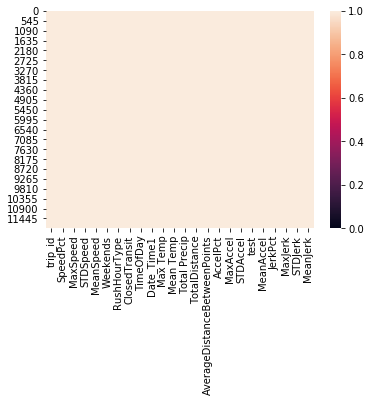

In [149]:
sns.heatmap(df_features.notnull())  # Need to see why so many Nan Values across all features

In [150]:
df_features.fillna(value = 0, inplace=True) # Fill Nan Values with the value 0. 

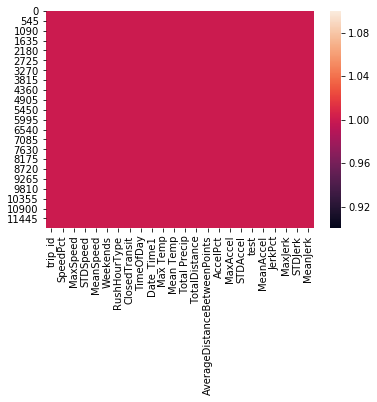

In [151]:
sns.heatmap(df_features.notnull())

In [152]:
df_features # Sanity Check for the current dataframe. 

,trip_id,SpeedPct,MaxSpeed,STDSpeed,MeanSpeed,Weekends,RushHourType,ClosedTransit,TimeOfDay,Date_Time1,...,AverageDistanceBetweenPoints,AccelPct,MaxAccel,STDAccel,test,MeanAccel,JerkPct,MaxJerk,STDJerk,MeanJerk
0,1435119.0,6.558000,6.82000,1.811063,5.182500,0,NR,0,evening,2016-10-18 17:35:56,...,0.063921,0.055341,0.176667,0.110468,1.810294,-0.012075,0.005593,0.016156,0.009088,-0.000830
1,1435259.0,11.261100,13.50930,3.294527,8.326376,0,S,1,morning,2016-10-18 05:26:43,...,0.087020,0.405817,0.807573,0.441285,3.188346,-0.007649,0.082384,0.134595,0.065487,0.000837
2,1435307.0,12.170000,14.80000,3.801662,8.620635,0,NR,0,afternoon,2016-10-17 15:45:39,...,0.059570,0.281548,0.580000,0.282717,3.796281,0.006981,0.027467,0.081226,0.045742,-0.004737
3,1435318.0,14.810000,17.10000,3.764780,10.323404,0,NR,0,evening,2016-10-17 16:24:58,...,0.060145,0.523810,1.225000,0.484692,3.764779,0.030493,0.124896,0.233816,0.096995,-0.005030
4,1435322.0,3.687064,4.52607,1.409964,1.947943,0,NR,0,evening,2016-10-18 17:22:06,...,0.036808,0.035448,0.061202,0.104959,1.197090,-0.028192,0.004741,0.005351,0.010774,-0.002453
5,1435324.0,14.700000,17.40000,4.064794,9.749020,0,NR,0,evening,2016-10-17 17:23:17,...,0.059817,0.384881,0.920000,0.411849,4.062976,-0.003921,0.057024,0.288000,0.079595,-0.006276
6,1435334.0,1.470000,1.80000,0.635085,1.066667,0,S,0,night,2016-10-17 22:46:41,...,0.020355,-0.004459,0.000000,0.014865,0.000000,-0.014865,0.008304,0.009910,0.005354,0.004556
7,1435348.0,30.880000,33.40000,7.943593,22.221777,0,MR,0,morning,2016-10-18 08:14:46,...,0.106155,0.227976,1.450000,0.322442,7.920308,-0.006685,0.044837,0.266414,0.060266,-0.003797
8,1435416.0,11.100000,15.40000,3.382277,7.130088,0,MR,0,morning,2016-10-17 07:55:21,...,0.054977,0.294091,0.737500,0.276386,3.382132,0.006868,0.042910,0.100216,0.046849,-0.005446
9,1435428.0,14.730000,17.50000,4.157117,10.209434,0,NR,0,night,2016-10-18 18:00:50,...,0.060343,0.426161,2.260000,0.513892,4.131182,0.083702,0.106256,0.447000,0.125702,0.007965


In [153]:
df_features.drop(['test'],axis=1, inplace=True) # Drop the test column not needed anymore for analysis

### Standardize Numerical Features

In [154]:
from sklearn.preprocessing import StandardScaler

In [155]:
df_features.columns

Index(['trip_id', 'SpeedPct', 'MaxSpeed', 'STDSpeed', 'MeanSpeed', 'Weekends',
       'RushHourType', 'ClosedTransit', 'TimeOfDay', 'Date_Time1', 'Max Temp',
       'Mean Temp', 'Total Precip', 'TotalDistance',
       'AverageDistanceBetweenPoints', 'AccelPct', 'MaxAccel', 'STDAccel',
       'MeanAccel', 'JerkPct', 'MaxJerk', 'STDJerk', 'MeanJerk'],
      dtype='object')

In [156]:
features_to_scale = ['SpeedPct', 'MaxSpeed', 'STDSpeed', 'MeanSpeed', 'AccelPct', 'MaxAccel', 'STDAccel', 'MeanAccel', 'Max Temp',
       'Mean Temp', 'Total Precip','TotalDistance', 'AverageDistanceBetweenPoints','JerkPct','MaxJerk','STDJerk','MeanJerk']

In [157]:
scaling_initialization = StandardScaler()
df_features.loc[:, features_to_scale] = scaling_initialization.fit_transform(df_features[features_to_scale])

In [158]:
df_features_copy = df_features.copy()
copy_df_features = df_features.copy()

In [159]:
copy_df_features

,trip_id,SpeedPct,MaxSpeed,STDSpeed,MeanSpeed,Weekends,RushHourType,ClosedTransit,TimeOfDay,Date_Time1,...,TotalDistance,AverageDistanceBetweenPoints,AccelPct,MaxAccel,STDAccel,MeanAccel,JerkPct,MaxJerk,STDJerk,MeanJerk
0,1435119.0,-0.597274,-0.724038,-0.593191,-0.511509,0,NR,0,evening,2016-10-18 17:35:56,...,-0.600327,-0.204106,-0.789314,-0.784307,-0.711362,-0.091558,-0.503084,-0.577698,-0.596880,0.143028
1,1435259.0,-0.035495,-0.040810,0.012368,0.016973,0,S,1,morning,2016-10-18 05:26:43,...,-0.331571,-0.033398,1.138300,0.255554,1.050573,-0.038054,0.947680,-0.036887,0.315535,0.243956
2,1435307.0,0.073072,0.091019,0.219384,0.066437,0,NR,0,afternoon,2016-10-17 15:45:39,...,-0.313807,-0.236257,0.454820,-0.119532,0.206039,0.138799,-0.089824,-0.280579,-0.003900,-0.093449
3,1435318.0,0.388417,0.325935,0.204329,0.352671,0,NR,0,evening,2016-10-17 16:24:58,...,-0.402674,-0.232008,1.787257,0.943559,1.281759,0.423029,1.750832,0.416169,0.825282,-0.111212
4,1435322.0,-0.940204,-0.958334,-0.756922,-1.055234,0,NR,0,evening,2016-10-18 17:22:06,...,-0.645676,-0.404477,-0.898723,-0.974615,-0.740704,-0.286388,-0.519167,-0.627034,-0.569610,0.044789
5,1435324.0,0.375277,0.356576,0.326796,0.256117,0,NR,0,evening,2016-10-17 17:23:17,...,-0.381197,-0.234436,1.023152,0.440857,0.893798,0.007020,0.468571,0.663578,0.543786,-0.186663
6,1435334.0,-1.205029,-1.236767,-1.073232,-1.203375,0,S,0,night,2016-10-17 22:46:41,...,-0.668072,-0.526072,-1.118215,-1.075490,-1.220545,-0.125280,-0.451867,-0.606217,-0.657292,0.469108
7,1435348.0,2.307957,1.990775,1.910146,2.352772,0,MR,0,morning,2016-10-18 08:14:46,...,2.881131,0.108016,0.160178,1.314405,0.417613,-0.026397,0.238325,0.565014,0.231083,-0.036549
8,1435416.0,-0.054738,0.152301,0.048189,-0.184122,0,MR,0,morning,2016-10-17 07:55:21,...,-0.077797,-0.270201,0.523808,0.140060,0.172318,0.137433,0.201933,-0.193870,0.014011,-0.136423
9,1435428.0,0.378861,0.366790,0.364483,0.333512,0,NR,0,night,2016-10-18 18:00:50,...,0.246739,-0.230549,1.250190,2.649449,1.437276,1.066245,1.398678,1.389591,1.289694,0.675475


### OHE Function (One-Hot Encoding)

In [160]:
def OHEencode(df, cols):
    dummies = pd.get_dummies(df, columns = cols)
    output = pd.concat([original_dataframe, dummies], axis=1)
    return(output)

In [161]:
OHE_features = ['TimeOfDay','RushHourType']

In [162]:
features_finale = pd.get_dummies(copy_df_features,columns=OHE_features)

### Mode Data inputted into Notebook

In [163]:
mode = pd.read_csv("C:\\Python\\Hackathon\\Internship\\Mode_Filtered.csv")
mode.rename(columns={'id':'trip_id'}, inplace=True)
mode.drop(['index'],axis=1)

,trip_id,mode
0,1693055,3.0
1,1629365,3.0
2,1966430,3.0
3,1964839,2.0
4,1467160,3.0
5,3488393,0.0
6,2436240,3.0
7,3593170,3.0
8,3586226,4.0
9,3581422,3.0


In [164]:
final_features_df = features_finale.merge(mode, on='trip_id', how='outer')

In [165]:
df = final_features_df.dropna()

In [167]:
df = df.drop(['Date_Time1','index'],axis=1)

In [168]:
df.columns

Index(['trip_id', 'SpeedPct', 'MaxSpeed', 'STDSpeed', 'MeanSpeed', 'Weekends',
       'ClosedTransit', 'Max Temp', 'Mean Temp', 'Total Precip',
       'TotalDistance', 'AverageDistanceBetweenPoints', 'AccelPct', 'MaxAccel',
       'STDAccel', 'MeanAccel', 'JerkPct', 'MaxJerk', 'STDJerk', 'MeanJerk',
       'TimeOfDay_0', 'TimeOfDay_afternoon', 'TimeOfDay_evening',
       'TimeOfDay_lunch', 'TimeOfDay_morning', 'TimeOfDay_night',
       'RushHourType_MR', 'RushHourType_NR', 'RushHourType_S', 'mode'],
      dtype='object')

In [169]:
df.reset_index().to_csv('Final_Features_REALTemp.csv',index=False)

### TRAINING THE MODEL - Random Forest

In [171]:
import lightgbm as lgbm

import pandas as pd
import numpy as np

import sys, os

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score

In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_ml import ConfusionMatrix
import matplotlib.pyplot as plt

def confusion(true,pred):
    confusion_matrix = ConfusionMatrix(true, pred)
    confusion_matrix.plot()
    plt.set_cmap('Greens')
    plt.rcParams.update({'font.size': 12})
    return plt.show()

### Import the Data

In [173]:
df = pd.read_csv('C:\\Python\\Hackathon\\Internship\\Final_Features_REALTemp.csv').iloc[:, 1:]


### Testing and Training sets 

In [174]:
X_train = df.iloc[:, 1:-1]
y_train = df.iloc[:, -1]

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3)

### RandomForest Model

In [176]:
rf = RandomForestClassifier()

In [177]:
params = {
    'n_estimators' : [2,4,5,6,7,8,9,10,12,14,16,18,20],
    'max_depth' : [5, 10, 15, 20,25,30,35,40],
    'min_samples_leaf' : [5,10,15,20,25,30,35,40,45,50],
}

In [178]:
gcv = GridSearchCV(rf, params, verbose=2)

In [179]:
gcv.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 1040 candidates, totalling 3120 fits
[CV] max_depth=5, min_samples_leaf=5, n_estimators=2 .................
[CV] .. max_depth=5, min_samples_leaf=5, n_estimators=2, total=   0.0s
[CV] max_depth=5, min_samples_leaf=5, n_estimators=2 .................
[CV] .. max_depth=5, min_samples_leaf=5, n_estimators=2, total=   0.0s
[CV] max_depth=5, min_samples_leaf=5, n_estimators=2 .................
[CV] .. max_depth=5, min_samples_leaf=5, n_estimators=2, total=   0.0s
[CV] max_depth=5, min_samples_leaf=5, n_estimators=4 .................
[CV] .. max_depth=5, min_samples_leaf=5, n_estimators=4, total=   0.0s
[CV] max_depth=5, min_samples_leaf=5, n_estimators=4 .................
[CV] .. max_depth=5, min_samples_leaf=5, n_estimators=4, total=   0.0s
[CV] max_depth=5, min_samples_leaf=5, n_estimators=4 .................
[CV] .. max_depth=5, min_samples_leaf=5, n_estimators=4, total=   0.0s
[CV] max_depth=5, min_samples_leaf=5, n_estimators=5 .................
[CV] .. max_

[Parallel(n_jobs=1)]: Done 3120 out of 3120 | elapsed:  2.1min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [2, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 18, 20], 'max_depth': [5, 10, 15, 20, 25, 30, 35, 40], 'min_samples_leaf': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

### Best Parameters

In [180]:
gcv.best_params_

{'max_depth': 25, 'min_samples_leaf': 5, 'n_estimators': 18}

### Best In Sample Accuracy

In [181]:
gcv.best_score_

0.798592100117325

### Out of Sample Accuracy - Note Cross Validation Could be done here in this section

In [182]:
# Input the best params in the following block of code - i randomly set these parameters for now. 
rf = RandomForestClassifier(max_depth=25, min_samples_leaf=5, n_estimators=18)
rf = rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_pred, y_test)

0.7947080291970803

### Exporting the Randomforest

In [183]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

In [184]:
X_train.columns

Index(['SpeedPct', 'MaxSpeed', 'STDSpeed', 'MeanSpeed', 'Weekends',
       'ClosedTransit', 'Max Temp', 'Mean Temp', 'Total Precip',
       'TotalDistance', 'AverageDistanceBetweenPoints', 'AccelPct', 'MaxAccel',
       'STDAccel', 'MeanAccel', 'JerkPct', 'MaxJerk', 'STDJerk', 'MeanJerk',
       'TimeOfDay_0', 'TimeOfDay_afternoon', 'TimeOfDay_evening',
       'TimeOfDay_lunch', 'TimeOfDay_morning', 'TimeOfDay_night',
       'RushHourType_MR', 'RushHourType_NR', 'RushHourType_S'],
      dtype='object')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


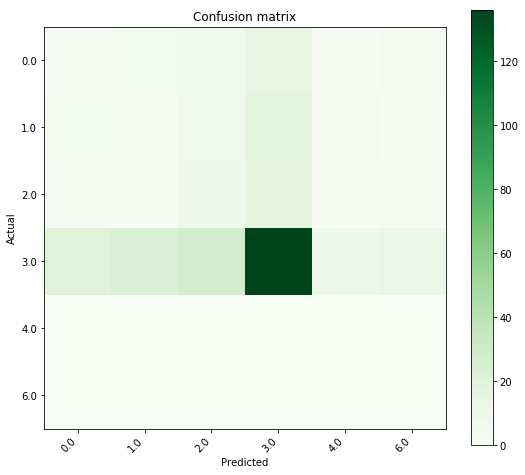

In [185]:
confusion(y_pred, y_test)